In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Step 1: Data Loading and Initial Exploration

#This step involves importing the dataset, loading it into a DataFrame, and reviewing its structure.

#Key actions:
#Loaded the dataset into Pandas
# Inspected the shape, columns, and data types
# Displayed the first few records for quick understanding


In [14]:
df = pd.read_csv("retail_store_inventory.csv")
print(df)
df.head()
df.info
df.describe()


             Date Store ID Product ID     Category Region  Inventory Level  \
0      2022-01-01     S001      P0001    Groceries  North              231   
1      2022-01-01     S001      P0002         Toys  South              204   
2      2022-01-01     S001      P0003         Toys   West              102   
3      2022-01-01     S001      P0004         Toys  North              469   
4      2022-01-01     S001      P0005  Electronics   East              166   
...           ...      ...        ...          ...    ...              ...   
73095  2024-01-01     S005      P0016    Furniture   East               96   
73096  2024-01-01     S005      P0017         Toys  North              313   
73097  2024-01-01     S005      P0018     Clothing   West              278   
73098  2024-01-01     S005      P0019         Toys   East              374   
73099  2024-01-01     S005      P0020    Groceries   East              117   

       Units Sold  Units Ordered  Demand Forecast  Price  Disco

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


# step 2: Basic EDA

#In this section, we perform a high-level structural analysis of the dataset to:
#Understand data dimensionality
#Identify missing values or duplicates
#Determine data types of each feature
#Assess uniqueness of records

In [15]:
df.isnull().sum()
df.duplicated().sum()
df.nunique()
df.dtypes

,0
Date,object
Store ID,object
Product ID,object
Category,object
Region,object
Inventory Level,int64
Units Sold,int64
Units Ordered,int64
Demand Forecast,float64
Price,float64


##  Step 3: EDA - Grouped Statistical Analysis
#Performed grouped aggregations to uncover category-wise and region-wise sales patterns

#Calculated total, average, minimum, and maximum units sold for each product category

#Generated region-wise summary statistics for sales distribution

#Conducted multi-level grouping with both Region and Category to analyze geographic category-level performance

#Interpreted patterns to identify which combinations of region and category drive the most sales




In [16]:
df.groupby('Category')['Units Sold'].sum()
df.groupby('Category')['Units Sold'].agg(['min', 'max', 'mean'])
df.groupby('Region')['Units Sold'].agg([ 'sum','min', 'max', 'mean','std'])
df.groupby(['Region', 'Category'])[['Units Ordered', 'Units Sold']].sum()

Units Ordered  Units Sold
Region Category                              
East   Clothing            416908      507229
       Electronics         405723      500086
       Furniture           393991      500612
       Groceries           409460      513781
       Toys                391837      489557
North  Clothing            385744      471608
       Electronics         389903      497362
       Furniture           412700      514960
       Groceries           394141      489323
       Toys                415189      511713
South  Clothing            408428      510882
       Electronics         396865      481488
       Furniture           404548      513403
       Groceries           408962      509235
       Toys                397023      492791
West   Clothing            403805      509447
       Electronics         399842      481496
       Furniture           406460      496042
       Groceries           393625      488143
       Toys                406173      496424

## Step 4: Feature Engineering

# Created new features to enhance analytical depth  
# Cumulative Sales  
# Category-level Profit Rank  
# Profit Margin  
# Mean Inventory Level by Region  
# Profit Flag (High vs Low)

##step 5 Visualizations
#Created bar plots to visualize Unit Sales across Regions, highlighting regional performance
#Generated a correlation heatmap to identify relationships among key numerical variables

Text(0.5, 1.0, 'Units Sold by Region')

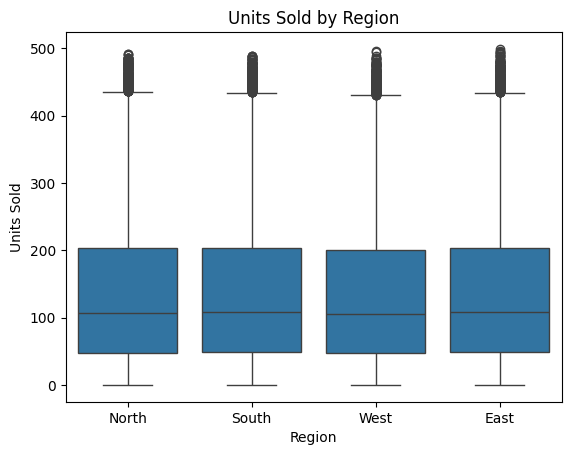

In [18]:
sns.boxplot(x = 'Region', y = 'Units Sold', data=df)
plt.title('Units Sold by Region')

#Correalation by heatmap


Text(0.5, 1.0, 'Correlation Matrix')

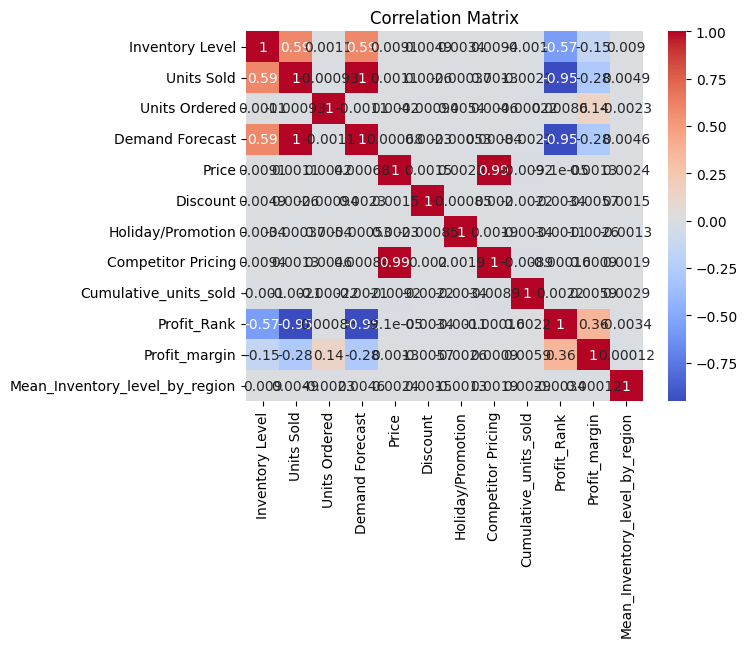

In [19]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

#Re-download the cleaned Dataset

In [24]:
df.to_csv("analyzed_output.csv", index=False)